In [139]:
# import libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats

In [140]:
# create a list of all of the urls we will be obtaining pbp data from
urls = []
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2018-11-06-20-michigan.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2018-11-10-19-michigan.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2018-11-14-18-villanova.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2018-11-17-12-george-washington.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2018-11-18-13-providence.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2018-11-23-16-michigan.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2018-11-23-16-michigan.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2018-12-01-15-michigan.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2018-12-04-21-northwestern.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2018-12-08-12-michigan.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2018-12-15-14-michigan.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2018-12-22-16-michigan.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2018-12-30-12-michigan.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-01-03-19-michigan.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-01-06-16-michigan.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-01-10-20-illinois.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-01-13-19-michigan.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-01-19-12-wisconsin.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-01-22-19-michigan.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-01-25-18-indiana.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-01-29-21-michigan.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-02-01-19-iowa.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-02-05-20-rutgers.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-02-09-12-michigan.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-02-12-20-penn-state.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-02-16-12-michigan.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-02-21-19-minnesota.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-02-24-15-michigan.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-02-28-19-michigan.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-03-03-15-maryland.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-03-09-20-michigan-state.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-03-15-21-michigan.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-03-16-15-michigan.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-03-17-15-michigan-state.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-03-21-21-michigan.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-03-23-17-michigan.html')
urls.append('https://www.sports-reference.com/cbb/boxscores/pbp/2019-03-28-21-michigan.html')

In [141]:
# define a function that will create a game log from a BeautifulSoup object passed in as a parameter
def create_gamelog(soup):
    # get all tbody sections
    table = soup.findAll("tbody")

    # locate the tbody section we are looking for by searching for the string "data-stat="time_remaining""
    i = 0
    for entry in table:
        x = str(entry)
        if "data-stat=\"time_remaining\"" in x:
            data = table[i]
        i+= 1

    # specify a list of columns for which we want to extract data from the html
    desired_columns = ['time_remaining', 'visitor_play', 'visitor_pts', 'score', 
                       'home_pts', 'home_play']

    # find all the rows from the play by play chart
    rows = data.find_all('tr')
    
    game_log = []

    # loop through each row in the html
    for row in rows:
        # create a list of the data for each row
        df_row = []
        # make sure there is a header tag in the current row we are looking at
        if (row.find('th', {"scope":"row"}) != None):
            # loop through each of our desired columns
            for c in desired_columns:
                # time_remaining is stored with a header tag
                if c == 'time_remaining':
                    cell = row.find("th",{"data-stat": c})
                # the rest of the columns in the chart are stored with a data tag
                else:
                    cell = row.find("td",{"data-stat": c})
                # make sure the cell actually contains data
                if cell != None:
                    # strip the html and format the data as text/ a string
                    a = cell.text.strip().encode()
                    text=a.decode("utf-8")
                    # add the piece of data to the list for that row
                    df_row.append(text)
        # if the length of the data row is 6 (meaning it is a full row), add it to the list of all rows of 
        # data for the chart
        if (len(df_row) == 6):
            game_log.append(df_row)
            
    return game_log  

In [142]:
# define the list of columns for the pandas dataframe
game_data_cols = ['Time Remaining', 'Visitor Play', 'V_PTS', 'Score', 
                  'H_PTS', 'Home Play']

# create a list of all of Michigan's games in the season to be used as key values for a dictionary
# uppercase indicates a home game, lowercase indicates a road game, * indicates a neutral court game
opponents = ['Norfolk State', 'Holy Cross', 'villanova', 'George Washington*', 'Providence*',
             'Chattanooga', 'North Carolina', 'Purdue', 'northwestern', 'South Carolina', 
             'Western Michigan', 'Air Force', 'Binghampton', 'Penn State', 'Indiana', 'illinois',
             'Northwestern', 'wisconsin', 'Minnesota', 'indiana', 'Ohio State', 'iowa', 
             'rutgers', 'Wisconsin', 'penn state', 'Maryland', 'minnesota', 'Michigan State', 
             'Nebraska', 'maryland', 'michigan state', 'Iowa*', 'Minnesota*','Michigan State*', 
             'Montana*', 'Florida*', 'Texas Tech*']

# create a dictionary where the keys will be opponents and the values will bw pandas dataframes of the pbp 
# data
pbp_data = {}

i = 0
# loop through each url provided for the 2018-19 season
for url in urls:
    # get the url and read the html using BeautifulSoup
    source = requests.get(url).text
    soup = BeautifulSoup(source)
    # create a gamelog, which is a list of lists of pbp data for an individual game
    g_log = create_gamelog(soup)
    
    # create a pandas dataframe from the gamelog
    game_data = pd.DataFrame(g_log, columns = game_data_cols)
    
    # add the dataframe to the play by play dictionary
    pbp_data[opponents[i]] = game_data
    
    i += 1

In [143]:
# creating a dictionary of all of the play by play data from the last five minutes of games
last_five = {}

# loop through each game in the season
for game in pbp_data:
    # this variable will be used to make sure we get the last 5 minutes of the second half
    half = 1
    df = pbp_data[game]
    
    # iterate through all of the rows in the current dataframe
    for index, row in df.iterrows():
        # determine if we have located the last five minutes of the game
        if row['Time Remaining'] < "05:00" and half == 2:
            slice_index = index
            break
        # determine if we have reached halftime and possibly update the half
        elif index != 0:
            prev_time = df.iloc[index - 1]['Time Remaining']
            if row['Time Remaining'] == "20:00" and prev_time == "00:00":
                half = half + 1
                
    # use the slice index to add the last five minutes of pbp data to the dictionary    
    last_five[game] = df.iloc[slice_index:]
    last_five[game] = last_five[game].reset_index(drop=True)

In [144]:
# creating a dictionary of all of the data from the last five minutes of games where the score is within 
# 6 points
clutch_time = {}

# loop through each game in the season
for game in last_five:
    df = last_five[game]
    
    # iterate through all of the rows in the current dataframe
    for index, row in df.iterrows():
        # split the score string into home and visitor scores
        score_string = row['Score']
        split_score = score_string.split('-')
        visitor_score = int(split_score[0])
        home_score = int(split_score[1])
        
        # determine if the score of the game is not within six points:
        differential = abs(visitor_score - home_score)
        if differential > 6:
            # drop the row from the data frame
            df.drop(index, inplace=True)
           
    # if it is not empty, add the remaining rows to the clutch time dictionary
    if not df.empty:
        clutch_time[game] = df
        clutch_time[game] = clutch_time[game].reset_index(drop=True)

In [145]:
# function to calculate a given player's clutch score for a specific game
def clutch_score_per_game(df, player):
    clutch_score = 0
    
    # iterate through all of the rows in the current dataframe
    for index, row in df.iterrows():

        # get the two pbp strings from the row
        away = row['Visitor Play']
        home = row['Home Play']

        # turnovers are negative 2.0 in clutch score
        if "turnover" in away or "turnover" in home:
            if "%s turnover" % (player) in away or "%s turnover" % (player) in home:
                clutch_score = clutch_score - 2.0

        # missed shots are worth negative 1.5 in clutch score
        if (("missed" in away and "field goal" in away) or ("missed" in home and "field goal" in home)) or \
        ("missed jump shot" in away or "missed jump shot" in home) or \
        ("missed layup" in away or "missed layup" in home) or \
        ("missed hook shot" in away or "missed hook shot" in home):
            if player in away or player in home:
                clutch_score = clutch_score - 1.5

        # missed free throws are worth negative 1.6 in clutch score
        if "missed free throw" in away or "missed free throw" in home:
            if player in away or player in home:
                clutch_score = clutch_score - 1.6

        # made free throws are worth positive 0.5 in clutch score
        if "made free throw" in away or "made free throw" in home:
            if player in away or player in home:
                clutch_score = clutch_score + 0.5

        # drawing a foul is worth positive 1.5 in clutch score
        if "fouled on the play" in away or "fouled on the play" in home:
            if player in away or player in home:
                clutch_score = clutch_score + 1.5

        # a defensive rebound is worth positive 0.8 in clutch score
        if "defensive rebound" in away or "defensive rebound" in home:
            if player in away or player in home:
                clutch_score = clutch_score + 0.8

        # an offensive rebound is worth positive 1.5 in clutch score
        if "offensive rebound" in away or "offensive rebound" in home:
            if player in away or player in home:
                clutch_score = clutch_score + 1.5

        # an assist is worth positive 2.0 in clutch score
        if "assist" in away or "assist" in home:
            if player in away or player in home:
                clutch_score = clutch_score + 2.0

        # a made 3-pointer is worth positive 4.6 in clutch score
        if ("made 3-point field goal" in away or "made 3-point field goal" in home) or \
        ("made 3-point jump shot" in away or "made 3-point jump shot" in home):
            if player in away or player in home:
                clutch_score = clutch_score + 4.6

        # a made 2-point basket is worth positive 2.2 in clutch score
        if ("made layup" in away or "made layup" in home) or \
        ("made dunk" in away or "made dunk" in home) or \
        ("made hook shot" in away or "made hook shot" in home) or \
        ("made putback" in away or "made putback" in home) or \
        ("made jump shot" in away or "made jump shot" in home):
            if player in away or player in home:
                clutch_score = clutch_score + 2.2

    return clutch_score

In [146]:
# create a dictionary that will hold each player's list of clutch scores throughout the season
clutch_scores = {'Simpson': [], 'Poole': [], 'Matthews': [], 'Brazdeikis': [], 'Teske': [], 
                'Livers': []}

# iterate through all of the clutch time games in the season
for game in clutch_time:
    df = clutch_time[game]
    
    # for each player, calculate and store his clutch score for the current game
    for player in clutch_scores:
        cs = round(clutch_score_per_game(df, player), 2)
        clutch_scores[player].append(float(cs))

In [147]:
# get a number and list of games that actually contained "clutch time"
print(len(clutch_time))
for game in clutch_time:
    print(game)

9
northwestern
Western Michigan
wisconsin
Minnesota
Wisconsin
penn state
Michigan State
maryland
Michigan State*


In [148]:
# define variables for the number of games played for each of the six players
num_clutch_games = len(clutch_time)

# define a dictionary for the players' average clutch score per game
# Charles Matthews did not play in the road game at Maryland
clutch_score_pg = {'Simpson': sum(clutch_scores['Simpson']) / len(clutch_scores['Simpson']), 
                   'Poole': sum(clutch_scores['Poole']) / len(clutch_scores['Poole']),
                   'Matthews': sum(clutch_scores['Matthews']) / (len(clutch_scores['Matthews']) - 1), 
                   'Brazdeikis': sum(clutch_scores['Brazdeikis']) / len(clutch_scores['Brazdeikis']),
                   'Teske': sum(clutch_scores['Teske']) / len(clutch_scores['Teske']), 
                   'Livers': sum(clutch_scores['Livers']) / len(clutch_scores['Livers'])}

clutch_score_sd = {'Simpson': stats.stdev(clutch_scores['Simpson']), 
                   'Poole': stats.stdev(clutch_scores['Poole']),
                   'Matthews': stats.stdev(clutch_scores['Matthews']), 
                   'Brazdeikis': stats.stdev(clutch_scores['Brazdeikis']),
                   'Teske': stats.stdev(clutch_scores['Teske']), 
                   'Livers': stats.stdev(clutch_scores['Livers'])}

            Average Clutch Score per Game
Simpson                          1.666667
Poole                            2.211111
Matthews                         0.600000
Brazdeikis                       0.022222
Teske                            1.411111
Livers                           1.222222


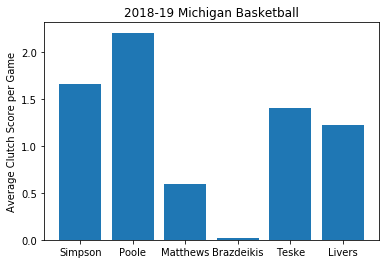

            Standard Deviation of Clutch Score
Simpson                               2.371708
Poole                                 3.420689
Matthews                              2.726261
Brazdeikis                            1.713022
Teske                                 1.763125
Livers                                2.043757


In [149]:
# Create a dataframe including each player's average clutch score per game
avg_clutch_score = pd.DataFrame.from_dict(clutch_score_pg, orient='index', 
                                          columns=['Average Clutch Score per Game'])
# Create a dataframe including each player's clutch score standard deviation
clutch_score_stdev = pd.DataFrame.from_dict(clutch_score_sd, orient='index', 
                                          columns=['Standard Deviation of Clutch Score'])
print(avg_clutch_score)

# Create a bar graph of each player's average clutch score per game
pairs = clutch_score_pg.items()
x, y = zip(*pairs)
plt.bar(x, y)
plt.ylabel('Average Clutch Score per Game')
plt.title('2018-19 Michigan Basketball')
plt.show()

print(clutch_score_stdev)

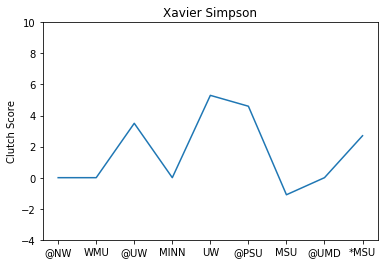

In [150]:
# Tracking Xavier Simposn's clutch score throughout the season
labels = ['@NW', 'WMU', '@UW', 'MINN', 'UW', '@PSU', 'MSU', '@UMD', '*MSU']
plt.plot(labels, clutch_scores['Simpson'])
plt.ylabel('Clutch Score')
plt.title('Xavier Simpson')
plt.ylim(top=10, bottom=-4)
plt.show()

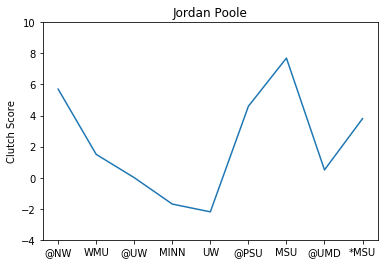

In [151]:
# Tracking Jordan Poole's clutch score throughout the season
plt.plot(labels, clutch_scores['Poole'])
plt.ylabel('Clutch Score')
plt.title('Jordan Poole')
plt.ylim(top=10, bottom=-4)
plt.show()

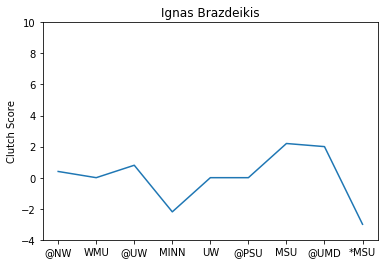

In [152]:
# Tracking Ignas Brazdeikis's clutch score throughout the season
plt.plot(labels, clutch_scores['Brazdeikis'])
plt.ylabel('Clutch Score')
plt.title('Ignas Brazdeikis')
plt.ylim(top=10, bottom=-4)
plt.show()

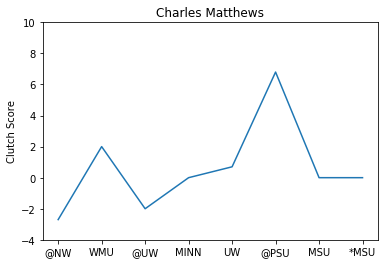

In [153]:
# Tracking Charles Matthews's clutch score throughout the season
labels_cm = ['@NW', 'WMU', '@UW', 'MINN', 'UW', '@PSU', 'MSU', '*MSU']
clutch_scores['Matthews'].pop(7)
plt.plot(labels_cm, clutch_scores['Matthews'])
plt.ylabel('Clutch Score')
plt.title('Charles Matthews')
plt.ylim(top=10, bottom=-4)
plt.show()

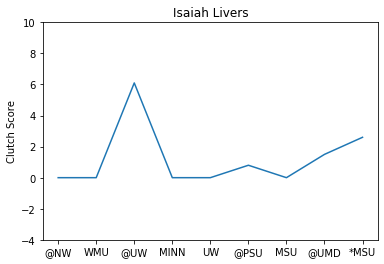

In [154]:
# Tracking Isaiah Livers's clutch score throughout the season
plt.plot(labels, clutch_scores['Livers'])
plt.ylabel('Clutch Score')
plt.title('Isaiah Livers')
plt.ylim(top=10, bottom=-4)
plt.show()

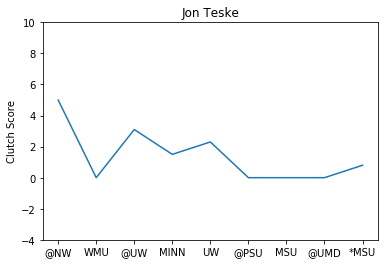

In [155]:
# Tracking Jon Teske's clutch score throughout the season
plt.plot(labels, clutch_scores['Teske'])
plt.ylabel('Clutch Score')
plt.title('Jon Teske')
plt.ylim(top=10, bottom=-4)
plt.show()

In [156]:
# Based on the results of this project, we can see that Jordan Poole had the highest 
# average clutch score per game played of all of the six players on Michigan's roster 
# who averaged more than 20 minutes per game. We can also see that Ignas Brazdeikis
# had by far the lowest average clutch score per game of the six players that were 
# examined. However, Jordan Poole also had the highest standard deviation for his
# clutch score, meaning someone like Xavier Simpson, who had a lower average but also
# a lower standard deviation was probably a more consistent performer during "clutch
# time" throughout the season